# Install Packages

In [1]:
install.packages("caret")
install.packages("corrr")
install.packages("dplyr")
install.packages("xgboost")
install.packages("DiagrammeR")
install.packages("rsvg")
install.packages("DiagrammeRsvg")
install.packages("randomForest")
install.packages("ggraph")
install.packages("MLmetrics")

In [452]:
install.packages("crfsuite")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Read CSV

In [414]:
df <- read.csv("ObesityDataSet.csv")
head(df)

Gender Age Height Weight family_history_with_overweight FAVC FCVC NCP
1 Female 21  1.62   64.0   yes                            no   2    3  
2 Female 21  1.52   56.0   yes                            no   3    3  
3 Male   23  1.80   77.0   yes                            no   2    3  
4 Male   27  1.80   87.0   no                             no   3    3  
5 Male   22  1.78   89.8   no                             no   2    1  
6 Male   29  1.62   53.0   no                             yes  2    3  
  CAEC      SMOKE CH2O SCC FAF TUE CALC       MTRANS               
1 Sometimes no    2    no  0   1   no         Public_Transportation
2 Sometimes yes   3    yes 3   0   Sometimes  Public_Transportation
3 Sometimes no    2    no  2   1   Frequently Public_Transportation
4 Sometimes no    2    no  2   0   Frequently Walking              
5 Sometimes no    2    no  0   0   Sometimes  Public_Transportation
6 Sometimes no    2    no  0   0   Sometimes  Automobile           
  NObeyesdad         
1 Normal_Weight      
2 Normal_Weight      
3 Normal_Weight      
4 Overweight_Level_I 
5 Overweight_Level_II
6 Normal_Weight

In [20]:
sprintf("data dimension: %d %d", dim(df)[1], dim(df)[2])
sapply(df, class)

[1] "data dimension: 2111 17"

Gender                            Age 
                   "character"                      "numeric" 
                        Height                         Weight 
                     "numeric"                      "numeric" 
family_history_with_overweight                           FAVC 
                   "character"                    "character" 
                          FCVC                            NCP 
                     "numeric"                      "numeric" 
                          CAEC                          SMOKE 
                   "character"                    "character" 
                          CH2O                            SCC 
                     "numeric"                    "character" 
                           FAF                            TUE 
                     "numeric"                      "numeric" 
                          CALC                         MTRANS 
                   "character"                    "character" 
                    NObeyesdad 
                   "character"

# EDA

In [415]:
cleaned_df <- transform(df, 
                        Gender = as.factor(Gender), 
                        Age = as.integer(Age),
                        family_history_with_overweight = as.factor(family_history_with_overweight), 
                        FAVC = as.factor(FAVC), 
                        FCVC = as.integer(FCVC),
                        NCP = as.integer(NCP),
                        CAEC = as.factor(CAEC),
                        SMOKE = as.factor(SMOKE), 
                        SCC = as.factor(SCC), 
                        FAF = as.integer(FAF),
                        TUE = as.integer(TUE),
                        CALC = as.factor(CALC), 
                        MTRANS = as.factor(MTRANS), 
                        NObeyesdad = as.factor(NObeyesdad))
head(cleaned_df)

Gender Age Height Weight family_history_with_overweight FAVC FCVC NCP
1 Female 21  1.62   64.0   yes                            no   2    3  
2 Female 21  1.52   56.0   yes                            no   3    3  
3 Male   23  1.80   77.0   yes                            no   2    3  
4 Male   27  1.80   87.0   no                             no   3    3  
5 Male   22  1.78   89.8   no                             no   2    1  
6 Male   29  1.62   53.0   no                             yes  2    3  
  CAEC      SMOKE CH2O SCC FAF TUE CALC       MTRANS               
1 Sometimes no    2    no  0   1   no         Public_Transportation
2 Sometimes yes   3    yes 3   0   Sometimes  Public_Transportation
3 Sometimes no    2    no  2   1   Frequently Public_Transportation
4 Sometimes no    2    no  2   0   Frequently Walking              
5 Sometimes no    2    no  0   0   Sometimes  Public_Transportation
6 Sometimes no    2    no  0   0   Sometimes  Automobile           
  NObeyesdad         
1 Normal_Weight      
2 Normal_Weight      
3 Normal_Weight      
4 Overweight_Level_I 
5 Overweight_Level_II
6 Normal_Weight

In [155]:
sapply(cleaned_df, function(x)all(is.na(x)))

Gender                            Age 
                         FALSE                          FALSE 
                        Height                         Weight 
                         FALSE                          FALSE 
family_history_with_overweight                           FAVC 
                         FALSE                          FALSE 
                          FCVC                            NCP 
                         FALSE                          FALSE 
                          CAEC                          SMOKE 
                         FALSE                          FALSE 
                          CH2O                            SCC 
                         FALSE                          FALSE 
                           FAF                            TUE 
                         FALSE                          FALSE 
                          CALC                         MTRANS 
                         FALSE                          FALSE 
                    NObeyesdad 
                         FALSE

In [156]:
summary(cleaned_df)

    Gender          Age            Height          Weight      
 Female:1043   Min.   :14.00   Min.   :1.450   Min.   : 39.00  
 Male  :1068   1st Qu.:19.00   1st Qu.:1.630   1st Qu.: 65.47  
               Median :22.00   Median :1.700   Median : 83.00  
               Mean   :23.97   Mean   :1.702   Mean   : 86.59  
               3rd Qu.:26.00   3rd Qu.:1.768   3rd Qu.:107.43  
               Max.   :61.00   Max.   :1.980   Max.   :173.00  
                                                               
 family_history_with_overweight  FAVC           FCVC            NCP       
 no : 385                       no : 245   Min.   :1.000   Min.   :1.000  
 yes:1726                       yes:1866   1st Qu.:2.000   1st Qu.:2.000  
                                           Median :2.000   Median :3.000  
                                           Mean   :2.213   Mean   :2.523  
                                           3rd Qu.:3.000   3rd Qu.:3.000  
                                      

## Plotting

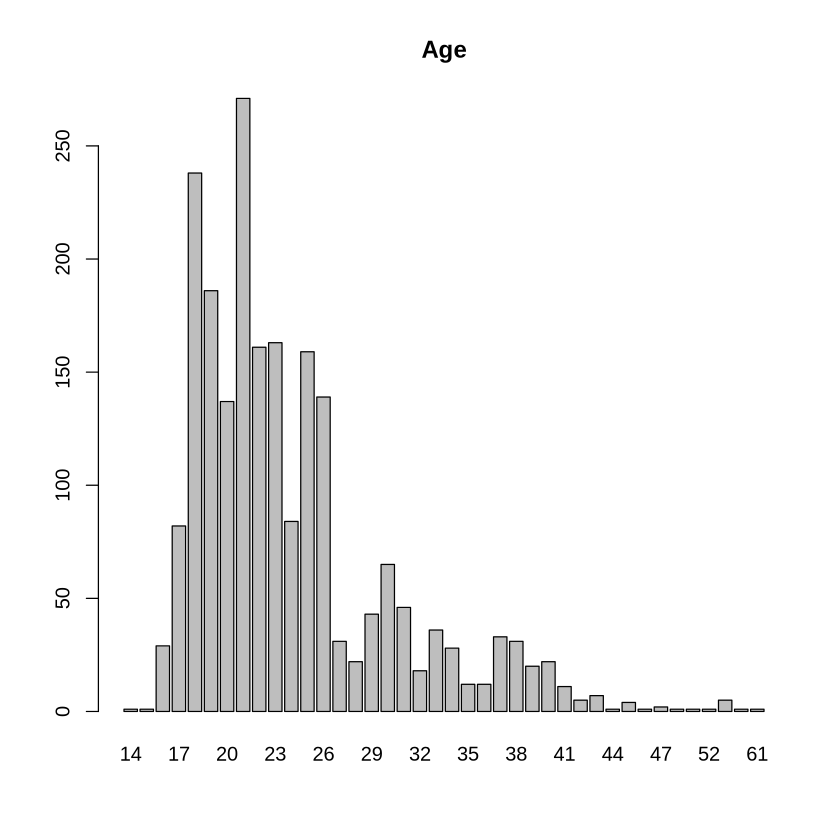

In [120]:
barplot(table(cleaned_df$Age), main="Age")

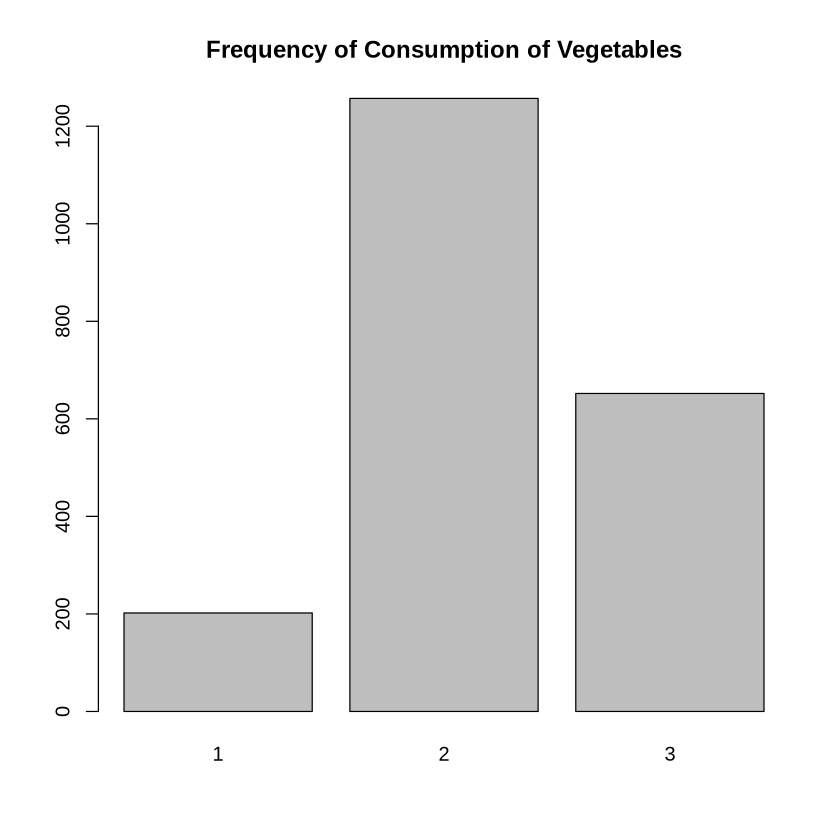

In [121]:
barplot(table(cleaned_df$FCVC), main="Frequency of Consumption of Vegetables")

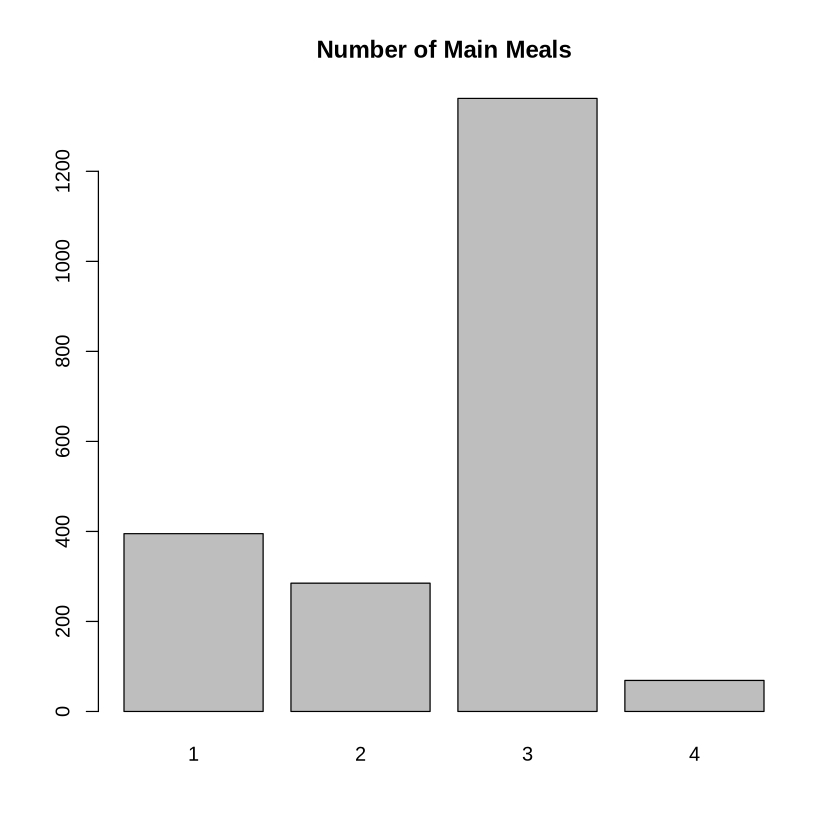

In [122]:
barplot(table(cleaned_df$NCP), main="Number of Main Meals")

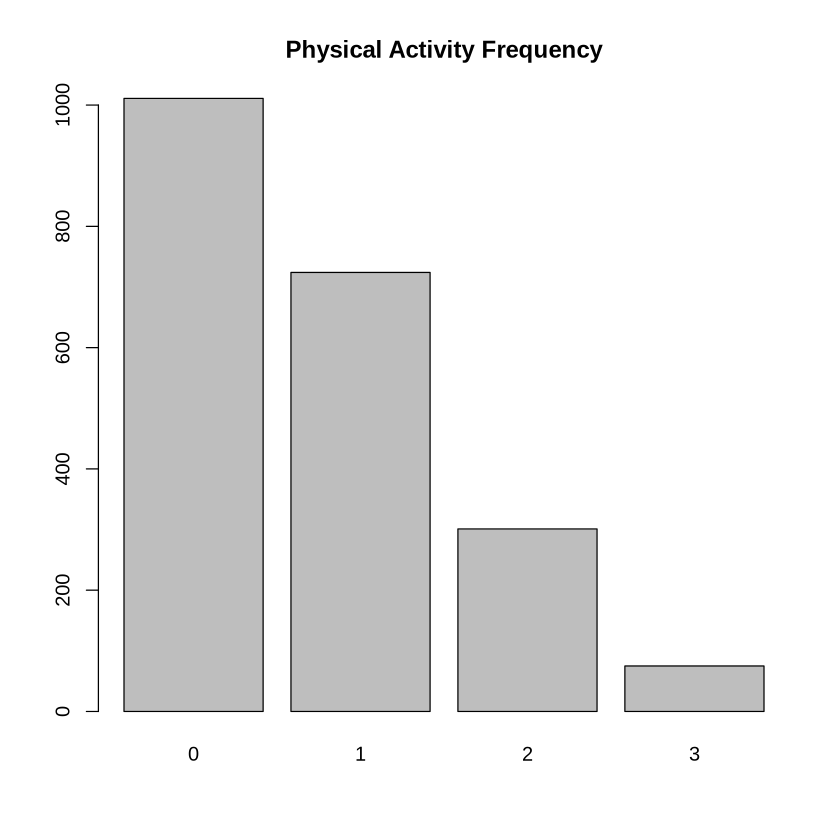

In [123]:
barplot(table(cleaned_df$FAF), main="Physical Activity Frequency")

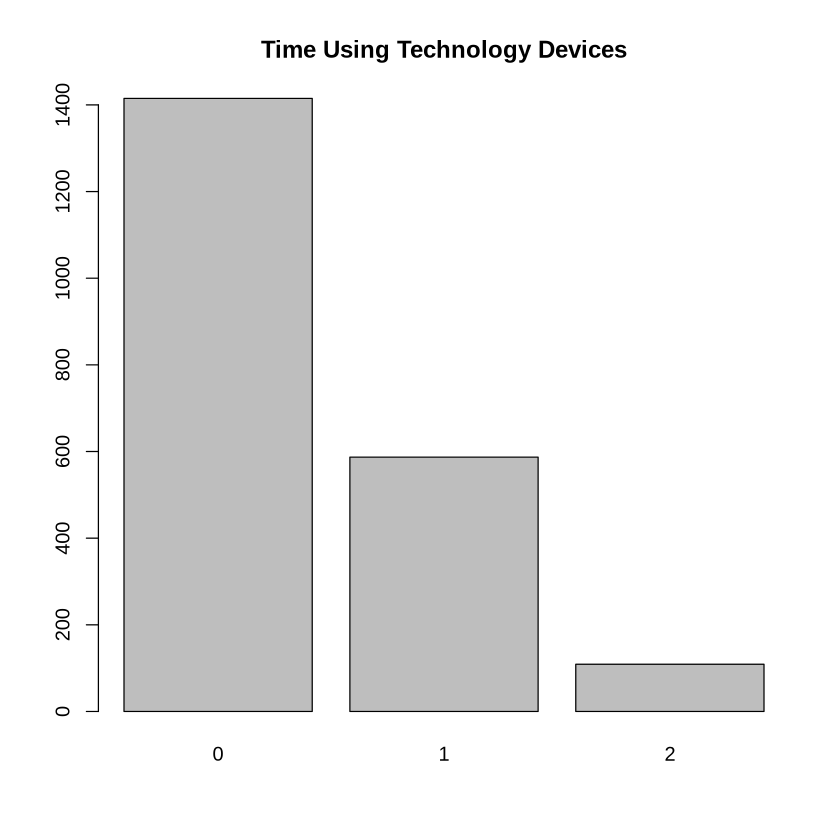

In [128]:
barplot(table(cleaned_df$TUE), main="Time Using Technology Devices")

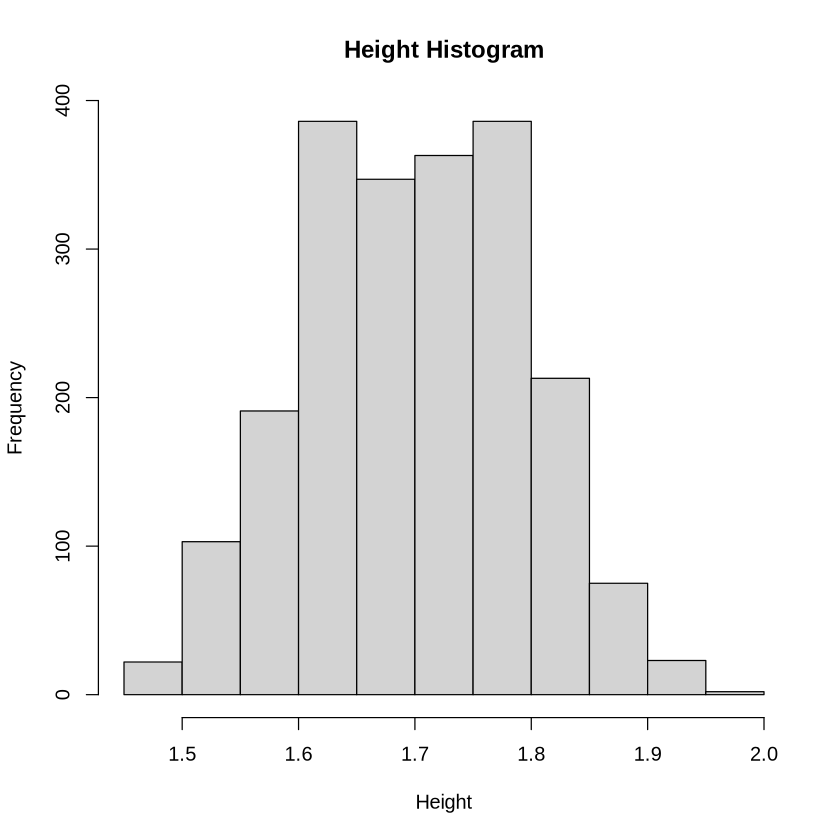

In [134]:
hist(cleaned_df$Height, xlab="Height", main="Height Histogram")

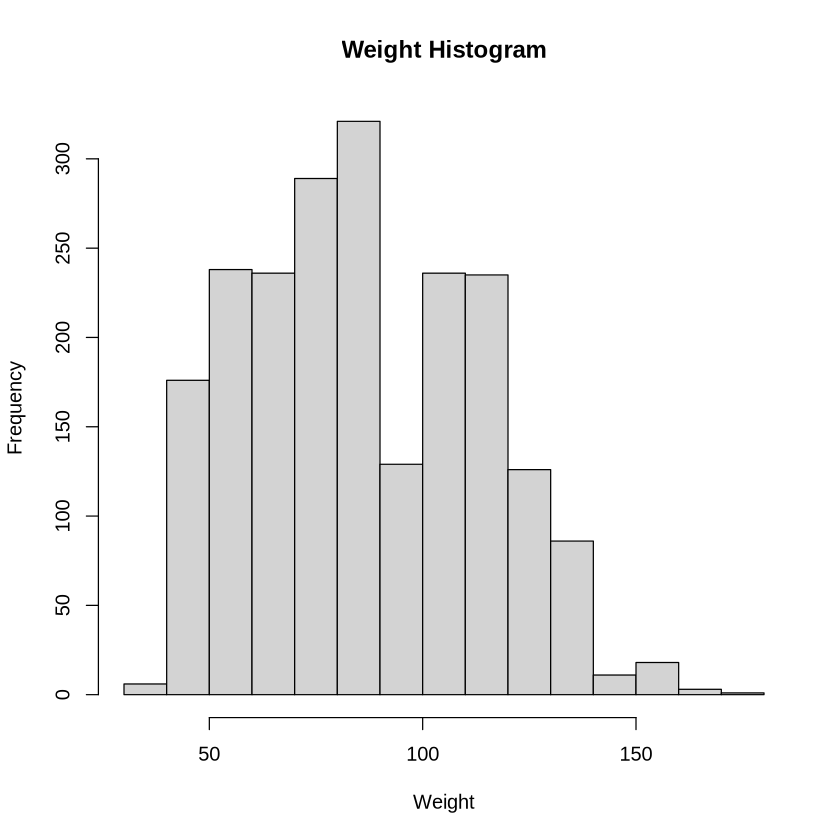

In [135]:
hist(cleaned_df$Weight, xlab="Weight", main="Weight Histogram")


Insufficient_Weight       Normal_Weight      Obesity_Type_I     Obesity_Type_II 
                272                 287                 351                 297 
   Obesity_Type_III  Overweight_Level_I Overweight_Level_II 
                324                 290                 290 


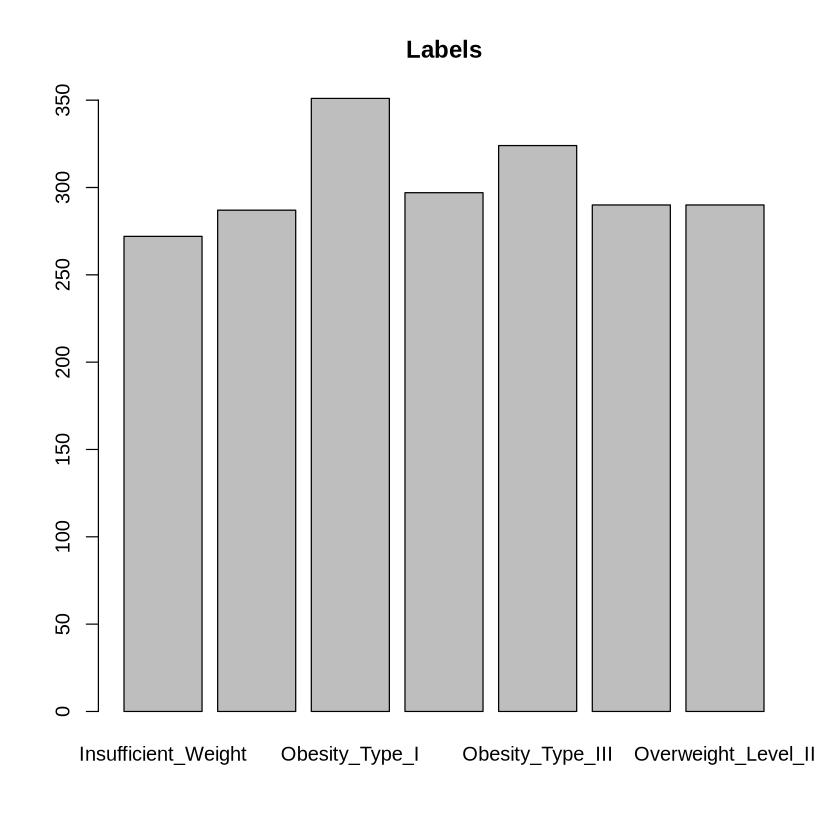

In [164]:
print(table(cleaned_df$NObeyesdad))
barplot(table(cleaned_df$NObeyesdad), main="Labels")


Female   Male 
  1043   1068 


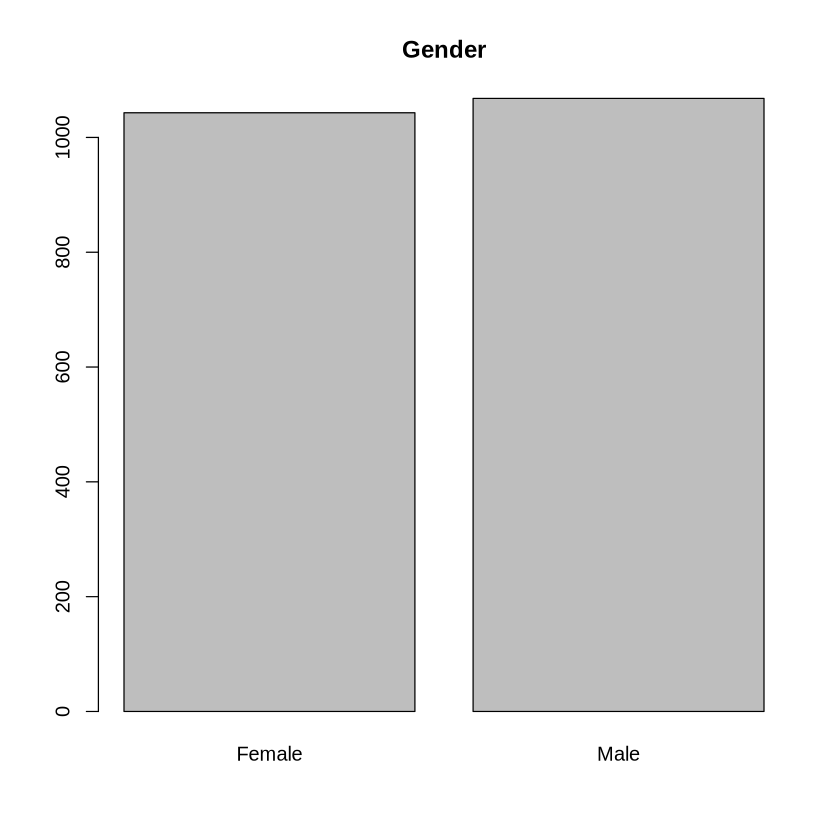

In [106]:
print(table(cleaned_df$Gender))
barplot(table(cleaned_df$Gender), main="Gender")


  no  yes 
 385 1726 


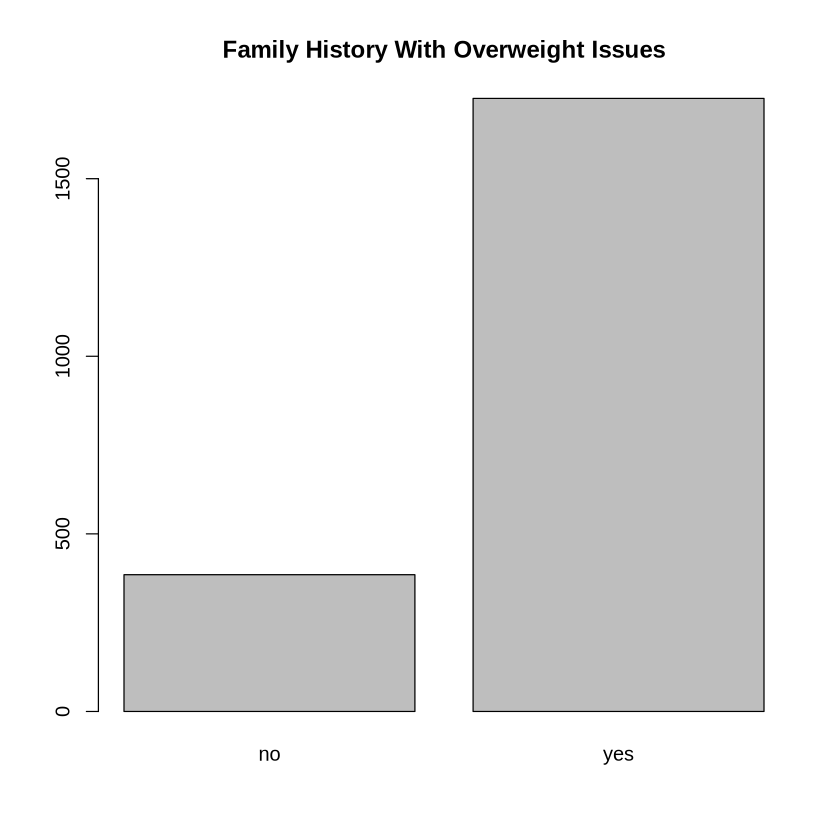

In [107]:
print(table(cleaned_df$family_history_with_overweight))
barplot(table(cleaned_df$family_history_with_overweight), main="Family History With Overweight Issues")


  no  yes 
 245 1866 


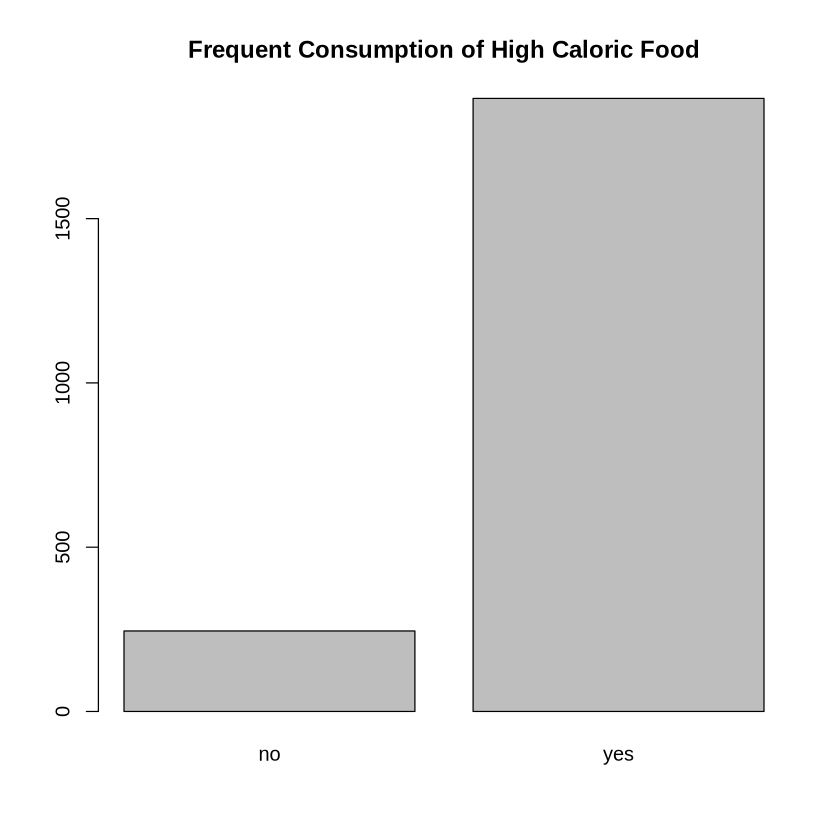

In [108]:
print(table(cleaned_df$FAVC))
barplot(table(cleaned_df$FAVC), main="Frequent Consumption of High Caloric Food")


    Always Frequently         no  Sometimes 
        53        242         51       1765 


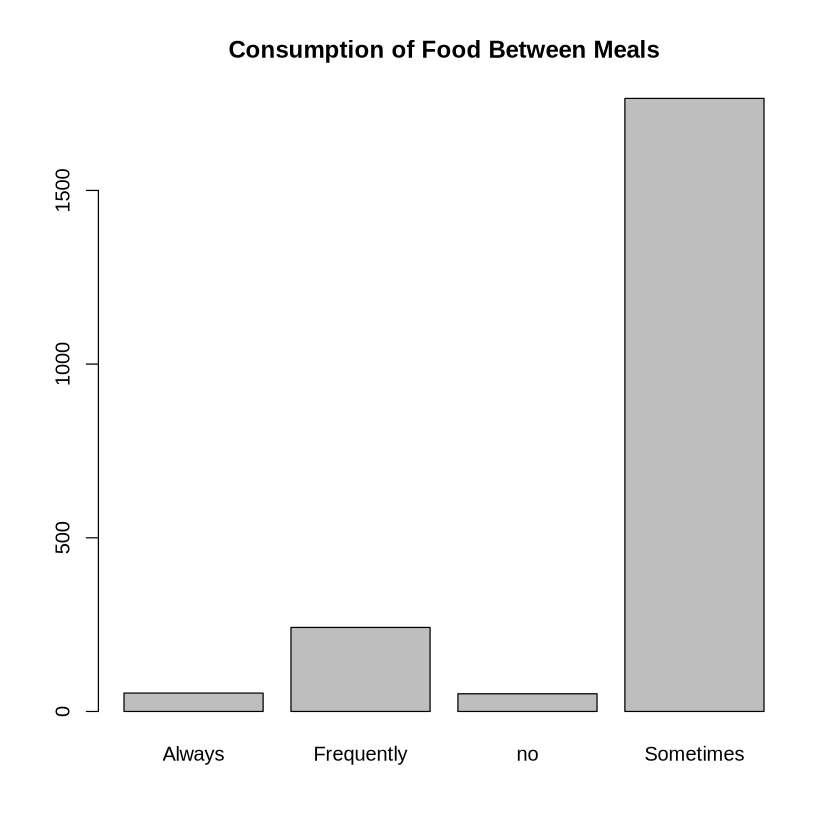

In [109]:
print(table(cleaned_df$CAEC))
barplot(table(cleaned_df$CAEC), main="Consumption of Food Between Meals")


  no  yes 
2067   44 


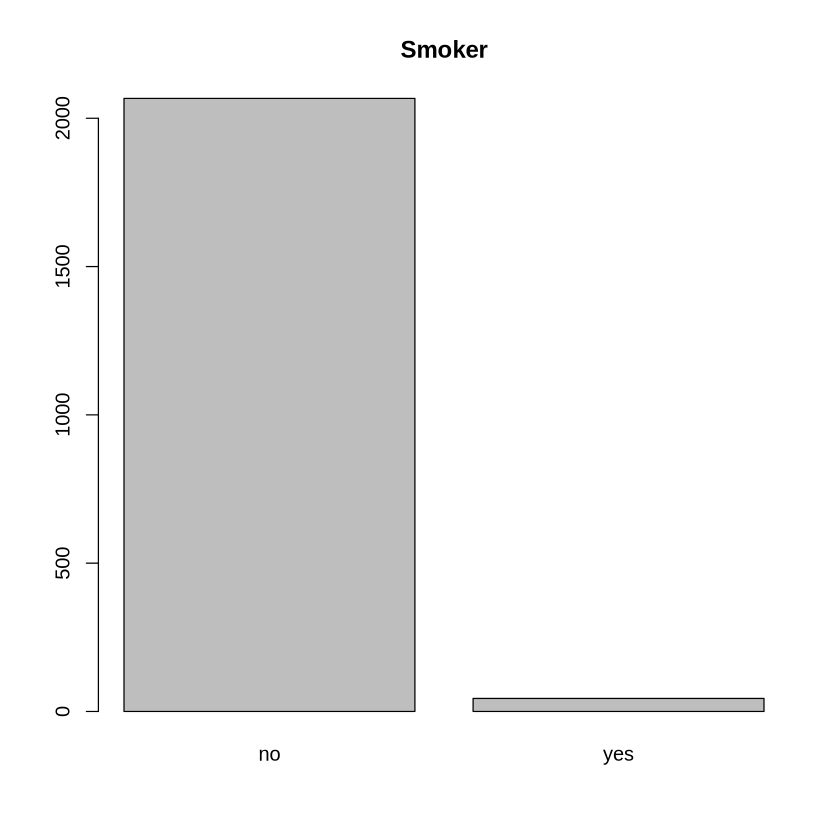

In [110]:
print(table(cleaned_df$SMOKE))
barplot(table(cleaned_df$SMOKE), main="Smoker")


  no  yes 
2015   96 


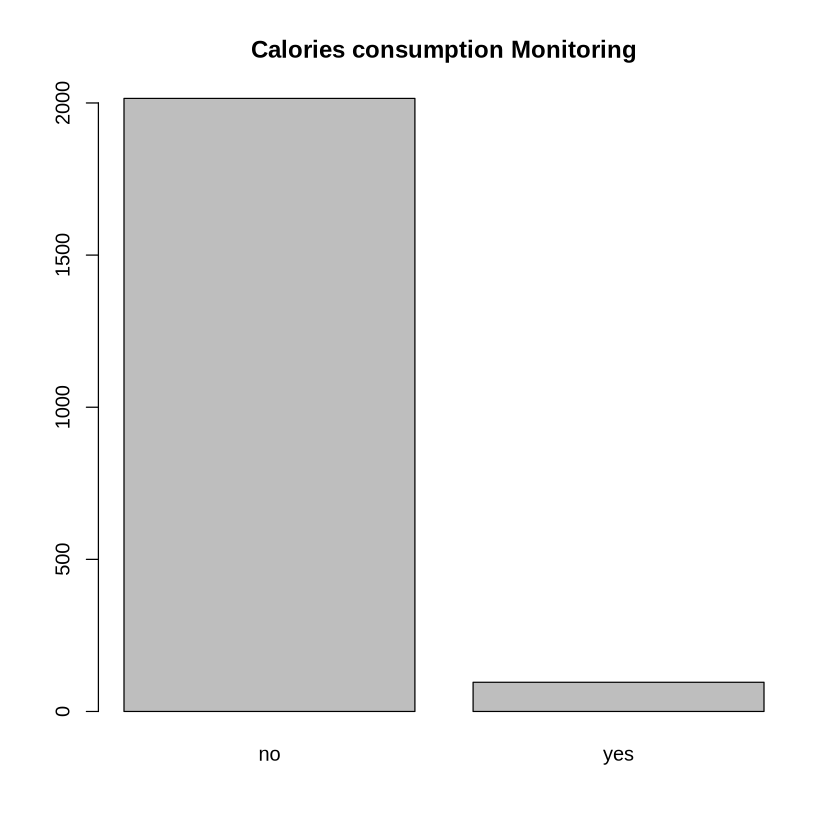

In [111]:
print(table(cleaned_df$SCC))
barplot(table(cleaned_df$SCC), main="Calories consumption Monitoring")


    Always Frequently         no  Sometimes 
         1         70        639       1401 


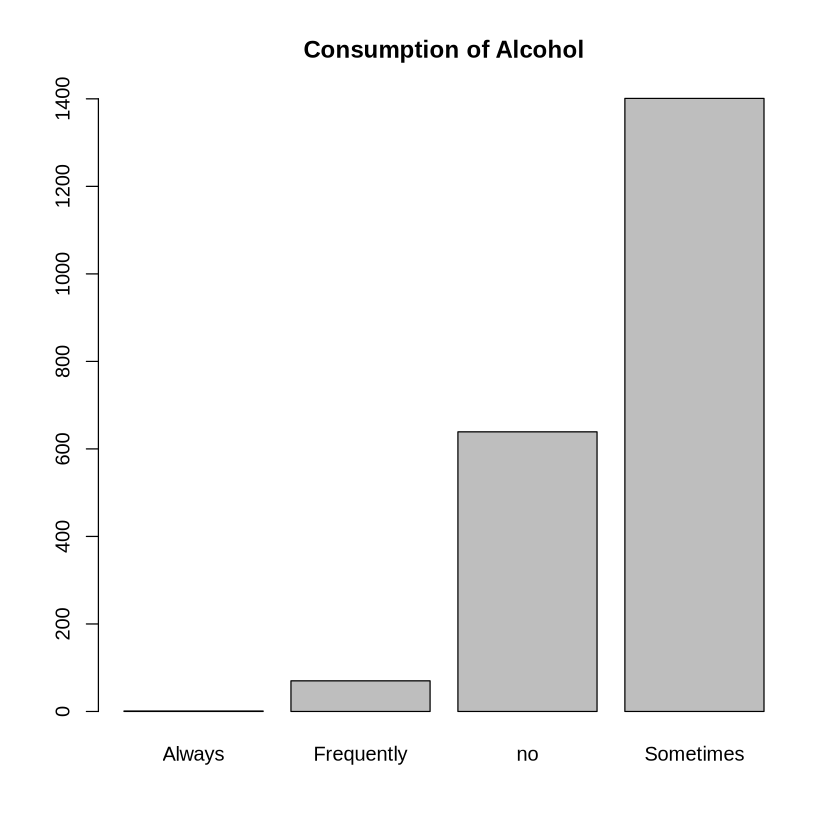

In [112]:
print(table(cleaned_df$CALC))
barplot(table(cleaned_df$CALC), main="Consumption of Alcohol")


           Automobile                  Bike             Motorbike 
                  457                     7                    11 
Public_Transportation               Walking 
                 1580                    56 


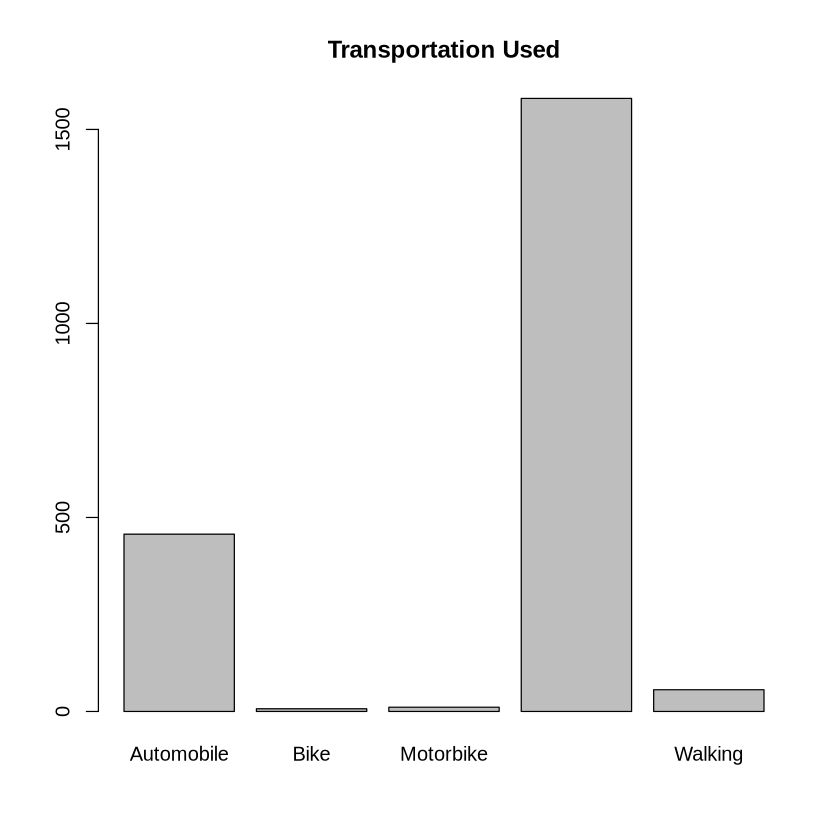

In [113]:
print(table(cleaned_df$MTRANS))
barplot(table(cleaned_df$MTRANS), main="Transportation Used")

## Find Correlations

In [114]:
corrr::correlate(cleaned_df, method = "spearman")

Non-numeric variables removed from input: `Gender`, `family_history_with_overweight`, `FAVC`, `CAEC`, `SMOKE`, `SCC`, `CALC`, `MTRANS`, and `NObeyesdad`
Correlation computed with
• Method: 'spearman'
• Missing treated using: 'pairwise.complete.obs'


term   Age          Height       Weight      FCVC        NCP        
1 Age              NA -0.009824782  0.33883715  0.01332190 -0.08111149
2 Height -0.009824782           NA  0.46254814 -0.08964151  0.19514325
3 Weight  0.338837149  0.462548144          NA  0.17134422  0.08011638
4 FCVC    0.013321900 -0.089641508  0.17134422          NA  0.16528981
5 NCP    -0.081111491  0.195143250  0.08011638  0.16528981          NA
6 CH2O    0.008290269  0.225237195  0.22559236  0.09394637  0.08647877
7 FAF    -0.233537874  0.268997708 -0.13260538  0.01055125  0.12483916
8 TUE    -0.306157681  0.081548096 -0.04986969 -0.10419098  0.07132037
  CH2O        FAF         TUE        
1 0.008290269 -0.23353787 -0.30615768
2 0.225237195  0.26899771  0.08154810
3 0.225592359 -0.13260538 -0.04986969
4 0.093946370  0.01055125 -0.10419098
5 0.086478765  0.12483916  0.07132037
6          NA  0.16460834  0.02316174
7 0.164608339          NA  0.02851653
8 0.023161744  0.02851653          NA

# Create Model

## Split Dataset

In [416]:
trainIndex <- caret::createDataPartition(cleaned_df$NObeyesdad, p = .8, list = FALSE)
trainDataset <- df[trainIndex, ]
testDataset <- df[-trainIndex, ]

print(paste("train dataset rows: ", nrow(trainDataset)))
print(paste("test dataset rows: ", nrow(testDataset)))

[1] "train dataset rows:  1691"
[1] "test dataset rows:  420"


In [472]:
features = colnames(subset(trainDataset, select = -c(NObeyesdad)))

features

[1] "Gender"                         "Age"                           
 [3] "Height"                         "Weight"                        
 [5] "family_history_with_overweight" "FAVC"                          
 [7] "FCVC"                           "NCP"                           
 [9] "CAEC"                           "SMOKE"                         
[11] "CH2O"                           "SCC"                           
[13] "FAF"                            "TUE"                           
[15] "CALC"                           "MTRANS"

## Create And Save Model

In [274]:
caret::modelLookup("rf")

model parameter label                         forReg forClass probModel
1 rf    mtry      #Randomly Selected Predictors TRUE   TRUE     TRUE

In [426]:
rfGrid <- expand.grid(
    mtry = c(2, 5, 12, 15, 20)
)

control <- caret::trainControl(method = "cv", number = 5)

set.seed(42)
rfModel <- caret::train(NObeyesdad ~ ., data = trainDataset, method = "rf", trControl = control, metric = "Accuracy", tuneGrid = rfGrid)

saveRDS(rfModel, "fine_tuned_rf_model.rds")

In [427]:
rfModel

Random Forest 

1691 samples
  16 predictor
   7 classes: 'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1352, 1354, 1352, 1353, 1353 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8828747  0.8631786
   5    0.9497284  0.9412940
  12    0.9568290  0.9495788
  15    0.9615558  0.9551005
  20    0.9609536  0.9543966

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 15.

## Load Model (Optional)

In [380]:
rfModel <- readRDS("fine_tuned_rf_model.rds")
rfModel

Random Forest 

1691 samples
  16 predictor
   7 classes: 'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1352, 1354, 1352, 1353, 1353 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8876435  0.8687688
   5    0.9390984  0.9288757
  12    0.9521022  0.9440545
  15    0.9509206  0.9426738
  20    0.9515175  0.9433718

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 12.

## Evaluate Model

In [428]:
rfModel[4]$results

mtry Accuracy  Kappa     AccuracySD  KappaSD   
1  2   0.8828747 0.8631786 0.018573189 0.02174320
2  5   0.9497284 0.9412940 0.010064696 0.01175354
3 12   0.9568290 0.9495788 0.003391117 0.00396454
4 15   0.9615558 0.9551005 0.009607306 0.01121258
5 20   0.9609536 0.9543966 0.010805097 0.01261715

In [429]:
summary(rfModel)

                Length Class      Mode     
call                4  -none-     call     
type                1  -none-     character
predicted        1691  factor     numeric  
err.rate         4000  -none-     numeric  
confusion          56  -none-     numeric  
votes           11837  matrix     numeric  
oob.times        1691  -none-     numeric  
classes             7  -none-     character
importance         23  -none-     numeric  
importanceSD        0  -none-     NULL     
localImportance     0  -none-     NULL     
proximity           0  -none-     NULL     
ntree               1  -none-     numeric  
mtry                1  -none-     numeric  
forest             14  -none-     list     
y                1691  factor     numeric  
test                0  -none-     NULL     
inbag               0  -none-     NULL     
xNames             23  -none-     character
problemType         1  -none-     character
tuneValue           1  data.frame list     
obsLevels           7  -none-   

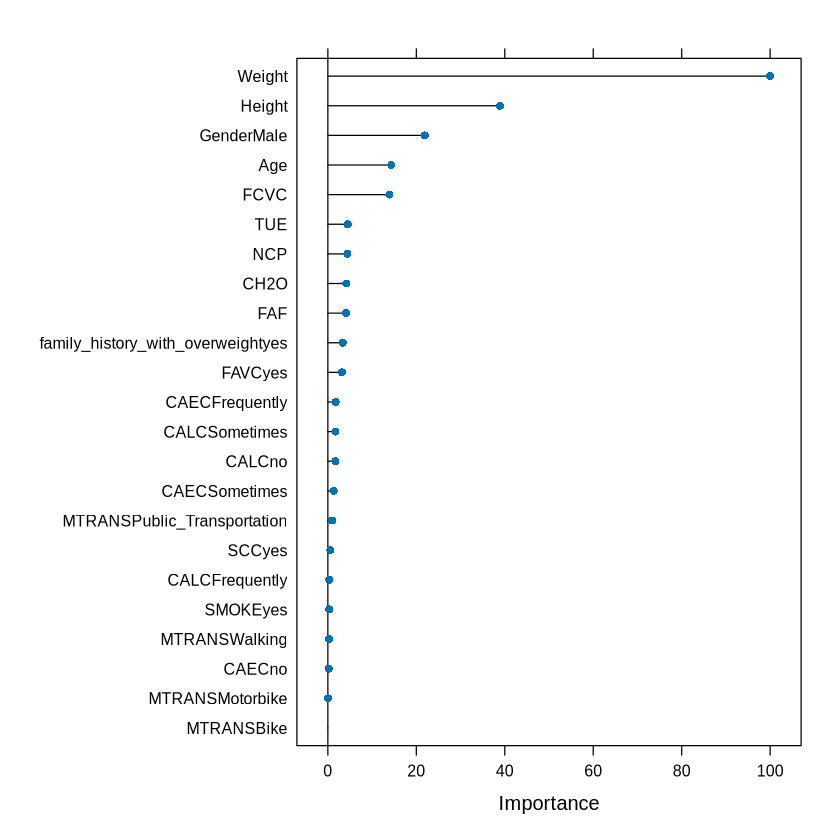

In [435]:
plot(caret::varImp(rfModel))

In [436]:
rfImportance <- randomForest::importance(rfModel$finalModel)

as.data.frame(rfImportance[order(rfImportance, decreasing=TRUE),])

rfImportance[order(rfImportance, decreasing = TRUE), ]
Weight                            647.0349444                                           
Height                            251.9925237                                           
GenderMale                        142.1398582                                           
Age                                93.2233081                                           
FCVC                               90.4625284                                           
TUE                                29.5715087                                           
NCP                                29.0889417                                           
CH2O                               27.4982888                                           
FAF                                27.0317413                                           
family_history_with_overweightyes  22.3121986                                           
FAVCyes                            21.1411162                                           
CAECFrequently                     11.9890649                                           
CALCSometimes                      11.7083763                                           
CALCno                             11.4990156                                           
CAECSometimes                       9.0972499                                           
MTRANSPublic_Transportation         6.5917156                                           
SCCyes                              4.2099462                                           
CALCFrequently                      2.5327774                                           
SMOKEyes                            2.4198635                                           
MTRANSWalking                       2.1984611                                           
CAECno                              1.9184552                                           
MTRANSMotorbike                     0.6967558                                           
MTRANSBike                          0.5298951

In [437]:
summary(rfModel$finalModel)

                Length Class      Mode     
call                4  -none-     call     
type                1  -none-     character
predicted        1691  factor     numeric  
err.rate         4000  -none-     numeric  
confusion          56  -none-     numeric  
votes           11837  matrix     numeric  
oob.times        1691  -none-     numeric  
classes             7  -none-     character
importance         23  -none-     numeric  
importanceSD        0  -none-     NULL     
localImportance     0  -none-     NULL     
proximity           0  -none-     NULL     
ntree               1  -none-     numeric  
mtry                1  -none-     numeric  
forest             14  -none-     list     
y                1691  factor     numeric  
test                0  -none-     NULL     
inbag               0  -none-     NULL     
xNames             23  -none-     character
problemType         1  -none-     character
tuneValue           1  data.frame list     
obsLevels           7  -none-   

In [438]:
rfModel$finalModel$forest

$ndbigtree
  [1] 231 233 181 195 193 245 193 269 299 259 177 283 229 185 241 269 211 241
 [19] 233 229 209 289 217 217 267 191 229 235 211 251 249 185 249 253 219 205
 [37] 187 229 193 227 241 229 295 199 211 235 231 241 225 217 163 277 301 273
 [55] 231 205 229 191 309 223 249 245 245 247 249 239 195 203 217 293 181 219
 [73] 231 269 189 185 261 281 303 247 241 201 205 267 289 315 177 227 207 233
 [91] 163 225 203 207 241 195 285 181 211 263 187 197 203 255 241 247 263 261
[109] 215 241 261 209 193 213 193 195 247 207 187 209 235 279 227 313 269 233
[127] 265 217 237 221 189 223 175 227 219 265 283 225 201 215 203 245 231 209
[145] 263 233 245 203 297 219 189 283 201 213 201 257 245 235 207 231 209 221
[163] 181 249 203 297 225 197 235 171 205 211 179 245 229 253 237 271 289 275
[181] 171 203 201 261 219 233 257 215 221 163 225 217 271 217 259 191 275 265
[199] 227 261 261 193 175 251 217 231 219 223 215 251 235 235 185 199 173 173
[217] 223 173 231 181 311 237 245 227 317 205 239 291 273 217 181 201 271 235
[235] 279 201 271 159 233 195 177 193 185 185 271 201 239 249 251 159 233 239
[253] 239 251 241 251 259 301 173 165 247 261 229 215 237 213 259 213 165 231
[271] 247 267 251 223 201 227 225 207 183 183 223 249 301 207 181 203 211 189
[289] 277 219 191 239 311 199 179 171 241 209 275 215 193 189 171 185 223 207
[307] 263 233 193 321 209 225 255 235 287 313 205 225 207 223 209 207 171 267
[325] 291 231 187 223 243 217 237 239 243 155 251 245 205 249 213 291 203 239
[343] 239 251 217 241 201 231 229 173 203 191 207 173 227 205 171 181 223 203
[361] 217 279 217 229 283 219 229 195 279 201 221 263 205 267 215 149 193 241
[379] 205 259 209 205 225 205 261 249 245 309 207 301 271 179 215 289 259 229
[397] 235 199 239 205 189 257 319 223 241 255 251 241 251 275 235 229 207 155
[415] 203 215 205 225 201 217 233 207 241 237 239 283 227 329 189 241 173 173
[433] 275 205 241 217 265 263 237 203 181 185 193 245 225 249 279 225 233 269
[451] 173 283 179 219 221 191 231 231 267 155 191 223 289 241 247 239 215 303
[469] 249 229 239 277 219 229 233 253 289 175 239 191 173 195 217 279 259 287
[487] 267 243 253 223 263 243 211 279 193 153 211 211 261 273

$nodestatus
       [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
  [1,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [2,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [3,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [4,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [5,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [6,]    1    1   -1    1    1    1   -1   -1    1     1    -1     1    -1
  [7,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [8,]    1    1    1    1    1    1    1    1    1     1     1     1     1
  [9,]    1    1    1    1    1    1    1    1    1     1     1     1     1
 [10,]    1    1    1    1    1    1    1    1    1     1     1     1     1
 [11,]    1    1    1    1    1    1    1    1    1     1     1     1     1
 [12,]    1   -1    1    1    1    1    1    1    1     1     1     1     1
 [13,]    1    1    1   -1    1    1    1    1    1     1     1     1     1
 [14,]   -1    1    1   -1   -1   -1    1    1    1    -1     1     1     1
 [15,]    1   -1    1    1    1    1    1    1    1     1     1     1     1
 [16,]    1    1    1    1    1    1    1    1    1     1     1     1     1
 [17,]   -1    1    1    1   -1    1   -1    1    1     1     1     1     1
 [18,]    1    1    1    1    1    1    1   -1    1     1     1     1     1
 [19,]    1    1    1    1    1    1    1    1    1     1     1     1     1
 [20,]    1    1    1    1    1   -1    1   -1    1     1     1     1     1
 [21,]    1    1    1    1    1    1    1    1    1     1     1     1     1
 [22,]   -1    1    1    1    1    1    1    1    1     1     1     1     1
 [23,]    1    1    1    1    1   -1    1    1    1     1   

In [439]:
print(paste("Number of nodes: ",rfModel$finalModel$forest$nrnodes))
print(paste("Number of trees: ", rfModel$finalModel$forest$ntree))

[1] "Number of nodes:  329"
[1] "Number of trees:  500"


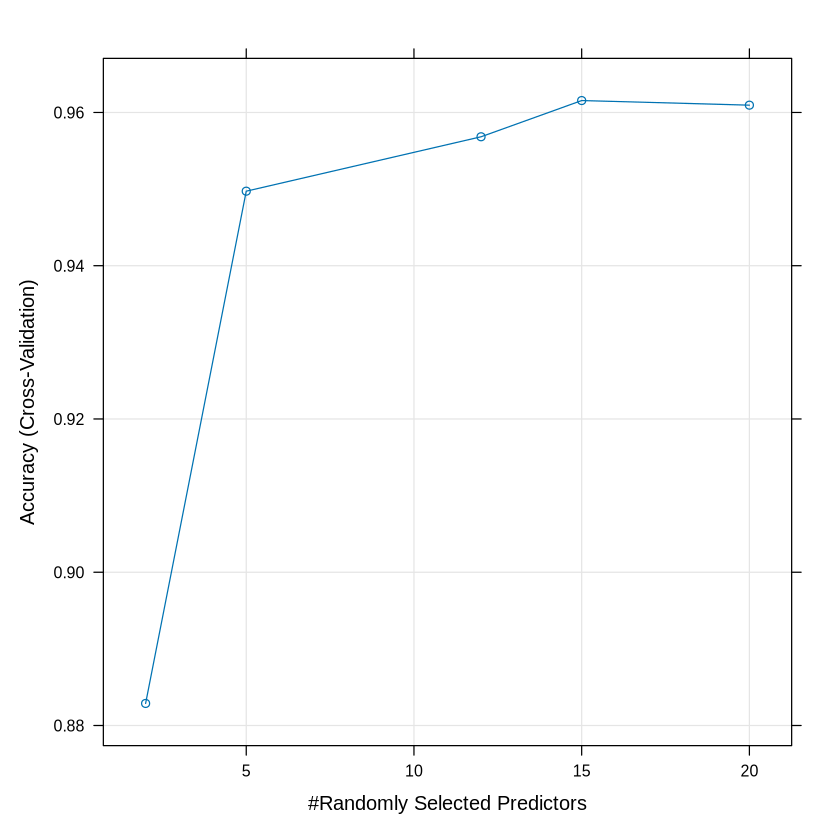

In [440]:
plot(rfModel)

In [446]:
randomForest::getTree(rfModel$finalModel, k=1, labelVar = TRUE)

as.dendrogram(randomForest::getTree(rfModel$finalModel, labelVar = TRUE))

left daughter right daughter split var                         split point
1    2             3             FCVC                                2.998976 
2    4             5             Weight                             99.928128 
3    6             7             Weight                            100.980927 
4    8             9             Weight                             59.995430 
5   10            11             CH2O                                2.317960 
6   12            13             Weight                             54.938555 
7   14            15             GenderMale                          0.500000 
8   16            17             FCVC                                2.002073 
9   18            19             family_history_with_overweightyes   0.500000 
10  20            21             Weight                            109.660201 
11  22            23             CALCSometimes                       0.500000 
12  24            25             CH2O                                1.092531 
13  26            27             Weight                             70.500000 
14   0             0             NA                                  0.000000 
15  28            29             Weight                            114.301357 
16  30            31             TUE                                 0.184567 
17   0             0             NA                                  0.000000 
18  32            33             Age                                19.038221 
19  34            35             Weight                             75.977115 
20  36            37             CH2O                                1.599273 
21  38            39             TUE                                 1.949665 
22   0             0             NA                                  0.000000 
23  40            41             Weight                            117.521543 
24  42            43             CAECFrequently                      0.500000 
25  44            45             Weight                             53.250000 
26  46            47             GenderMale                          0.500000 
27  48            49             Height                              1.706278 
28   0             0             NA                                  0.000000 
29  50            51             Age                                19.500000 
30  52            53             Weight                             43.000000 
⋮   ⋮             ⋮              ⋮                                 ⋮          
202   0             0            NA                                 0.000000  
203   0             0            NA                                 0.000000  
204   0             0            NA                                 0.000000  
205   0             0            NA                                 0.000000  
206   0             0            NA                                 0.000000  
207 214           215            Weight                            76.000000  
208 216           217            Height                             1.675000  
209   0             0            NA                                 0.000000  
210 218           219            TUE                                0.586898  
211   0             0            NA                                 0.000000  
212 220           221            TUE                                1.659145  
213   0             0            NA                                 0.000000  
214   0             0            NA                                 0.000000  
215   0             0            NA                                 0.000000  
216   0             0            NA                                 0.000000  
217   0             0            NA                                 0.000000  
218   0             0            NA                                 0.000000  
219   0             0            NA                                 0.000000  
220 222           223            NCP                  

ERROR: Error in UseMethod("as.dendrogram"): no applicable method for 'as.dendrogram' applied to an object of class "data.frame"


In [ ]:
library(dplyr)
library(ggraph)
library(igraph)
tree_func <- function(final_model, 
                      tree_num) {
  
  # get tree by index
  tree <- randomForest::getTree(final_model, 
                                k = tree_num, 
                                labelVar = TRUE) %>%
    tibble::rownames_to_column() %>%
    # make leaf split points to NA, so the 0s won't get plotted
    mutate(`split point` = ifelse(is.na(prediction), `split point`, NA))
  
  # prepare data frame for graph
  graph_frame <- data.frame(from = rep(tree$rowname, 2),
                            to = c(tree$`left daughter`, tree$`right daughter`))
  
  # convert to graph and delete the last node that we don't want to plot
  graph <- graph_from_data_frame(graph_frame) %>%
    delete_vertices("0")
  
  # set node labels
  V(graph)$node_label <- gsub("_", " ", as.character(tree$`split var`))
  V(graph)$leaf_label <- as.character(tree$prediction)
  V(graph)$split <- as.character(round(tree$`split point`, digits = 2))
  
  # plot
  plot <- ggraph(graph, 'dendrogram') + 
    theme_bw() +
    geom_edge_link() +
    geom_node_point() +
    geom_node_text(aes(label = node_label), na.rm = TRUE, repel = TRUE) +
    geom_node_label(aes(label = split), vjust = 2.5, na.rm = TRUE, fill = "white") +
    geom_node_label(aes(label = leaf_label, fill = leaf_label), na.rm = TRUE, 
                    repel = TRUE, colour = "white", fontface = "bold", show.legend = FALSE) +
    theme(panel.grid.minor = element_blank(),
          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          plot.background = element_rect(fill = "white"),
          panel.border = element_blank(),
          axis.line = element_blank(),
          axis.text.x = element_blank(),
          axis.text.y = element_blank(),
          axis.ticks = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          plot.title = element_text(size = 12))
    ggsave(file="tree.png", width=40, height=40, dpi=300, device = "png")
  
  print(plot)
}

Warning message:
“Duplicated aesthetics after name standardisation: na.rm”
Warning message:
“Duplicated aesthetics after name standardisation: na.rm”
Warning message:
“Duplicated aesthetics after name standardisation: na.rm”
Warning message:
“Removed 75 rows containing missing values (`geom_text_repel()`).”
Warning message:
“Removed 75 rows containing missing values (`geom_label()`).”
Warning message:
“Removed 74 rows containing missing values (`geom_label_repel()`).”
Warning message:
“Removed 75 rows containing missing values (`geom_text_repel()`).”
Warning message:
“Removed 75 rows containing missing values (`geom_label()`).”
Warning message:
“Removed 74 rows containing missing values (`geom_label_repel()`).”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 75 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


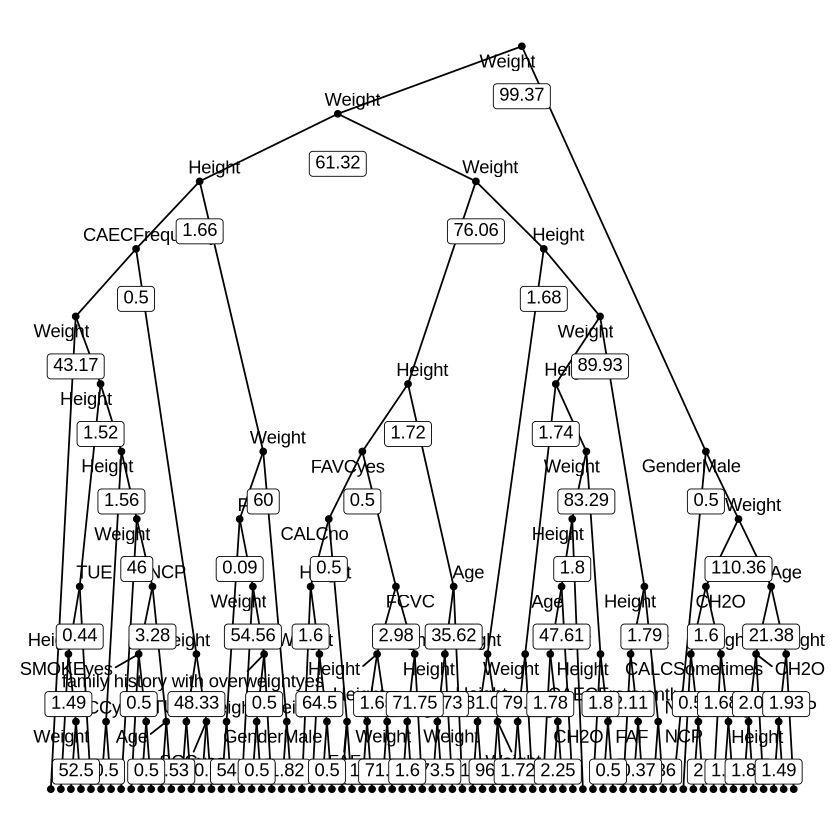

In [444]:
tree_num <- which(rfModel$finalModel$forest$ndbigtree == min(rfModel$finalModel$forest$ndbigtree))
tree_func(final_model = rfModel$finalModel, tree_num)

## Compare to Test Dataset

In [379]:
?precision

ppv                package:ModelMetrics                R Documentation

_P_o_s_i_t_i_v_e _P_r_e_d_i_c_t_i_v_e _V_a_l_u_e

_D_e_s_c_r_i_p_t_i_o_n:

     True Positives / (True Positives + False Positives)

_U_s_a_g_e:

     ppv(actual, predicted, cutoff = 0.5)
     
_A_r_g_u_m_e_n_t_s:

  actual: A vector of the labels

predicted: A vector of predicted values

  cutoff: A cutoff for the predicted values

_E_x_a_m_p_l_e_s:

     data(testDF)
     glmModel <- glm(y ~ ., data = testDF, family="binomial")
     Preds <- predict(glmModel, type = 'response')
     
     ppv(testDF$y, Preds, cutoff = 0)
     precision(testDF$y, Preds, cutoff = 0)

In [447]:
pred <- predict(rfModel, testDataset)
actual <- factor(testDataset$NObeyesdad)
levels(actual) <- levels(pred)

In [405]:
recall(actual,pred)

ERROR: Error in recall.default(actual, pred): input data must have the same two levels


In [451]:
?crf_evaluation

No documentation for ‘crf_evaluation’ in specified packages and libraries:
you could try ‘??crf_evaluation’

In [467]:
mat <- caret::confusionMatrix(actual, pred)
mat

Confusion Matrix and Statistics

                     Reference
Prediction            Insufficient_Weight Normal_Weight Obesity_Type_I
  Insufficient_Weight                  53             1              0
  Normal_Weight                         3            53              0
  Obesity_Type_I                        0             0             68
  Obesity_Type_II                       0             0              0
  Obesity_Type_III                      0             0              0
  Overweight_Level_I                    0             1              0
  Overweight_Level_II                   0             0              2
                     Reference
Prediction            Obesity_Type_II Obesity_Type_III Overweight_Level_I
  Insufficient_Weight               0                0                  0
  Normal_Weight                     0                0                  1
  Obesity_Type_I                    0                0                  0
  Obesity_Type_II                  58    

In [469]:
as.data.frame(mat$overall)

mat$overall  
Accuracy        9.619048e-01
Kappa           9.555058e-01
AccuracyLower   9.388717e-01
AccuracyUpper   9.780713e-01
AccuracyNull    1.666667e-01
AccuracyPValue 7.747613e-288
McnemarPValue            NaN

In [460]:
crfsuite::crf_evaluation(pred, actual)$bylabel

label               accuracy  precision recall    specificity f1       
1 Overweight_Level_I  0.9833333 0.9636364 0.9137931 0.9944751   0.9380531
2 Overweight_Level_II 0.9785714 0.9016393 0.9482759 0.9834254   0.9243697
3 Normal_Weight       0.9857143 0.9636364 0.9298246 0.9944904   0.9464286
4 Obesity_Type_I      0.9904762 0.9714286 0.9714286 0.9942857   0.9714286
5 Insufficient_Weight 0.9904762 0.9464286 0.9814815 0.9918033   0.9636364
6 Obesity_Type_III    0.9976190 0.9846154 1.0000000 0.9971910   0.9922481
7 Obesity_Type_II     0.9976190 1.0000000 0.9830508 1.0000000   0.9914530
  support
1 58     
2 58     
3 57     
4 70     
5 54     
6 64     
7 59

In [475]:
as.data.frame(crfsuite::crf_evaluation(pred, actual)$overall)

crfsuite::crf_evaluation(pred, actual)$overall
accuracy         0.9619048                                     
precision        0.9624662                                     
recall           0.9619048                                     
specificity      0.9937662                                     
f1               0.9619117                                     
precision_mean   0.9616264                                     
recall_mean      0.9611221                                     
specificity_mean 0.9936673                                     
f1_mean          0.9610882